In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(patchwork))) # figure composition
suppressPackageStartupMessages(suppressWarnings(library(cowplot))) # figure composition
suppressPackageStartupMessages(suppressWarnings(library(RcppTOML))) # parsing config file
suppressPackageStartupMessages(suppressWarnings(library(lattice))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(ComplexHeatmap))) # heatmap
suppressPackageStartupMessages(suppressWarnings(library(ggplotify))) # grob
suppressPackageStartupMessages(suppressWarnings(library(viridis))) # color
suppressPackageStartupMessages(suppressWarnings(library(platetools))) # make plate plot
suppressPackageStartupMessages(suppressWarnings(library(circlize))) 
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(stringr))) # string manipulation
suppressPackageStartupMessages(suppressWarnings(library(purrr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(VennDiagram))) # venn diagram
suppressPackageStartupMessages(suppressWarnings(library(tidyverse))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggvenn))) # venn diagram
suppressPackageStartupMessages(suppressWarnings(library(grid))) # grid
suppressPackageStartupMessages(suppressWarnings(library(Polychrome)))

source("../../utils/figure_themes.r")


In [2]:
cell_type <- "PBMC"


In [3]:
# set up directories
figure_dir <- file.path("..","figures")
if(!dir.exists(figure_dir)){
    dir.create(figure_dir)
}

## UMAP of morphological features

In [4]:
cell_umap_path <- file.path(paste0(
    "../","../","../","1.Exploratory_Data_Analysis/results/",cell_type,"_umap_values_morphology_sample_100.parquet"
))

cell_umap <- arrow::read_parquet(cell_umap_path)

In [5]:

# Load data
data_path_cytokine_values <- file.path("../../../2.Nomic_nELISA_Analysis/Data/clean/Plate2/nELISA_plate_430420_PBMC_clean.parquet")
cytokine_values <- arrow::read_parquet(data_path_cytokine_values)
# read in the ground truth data
data_path_ground_truth <- file.path("../../../4.sc_Morphology_Neural_Network_MLP_Model/MLP_utils/ground_truth.toml")
ground_truth <- parseTOML(data_path_ground_truth)
# make a a list of the treatments that are in the ground truth data
apoptosis_ground_truth_list <- c(ground_truth$Apoptosis$apoptosis_groups_list)
pyroptosis_ground_truth_list <- c(ground_truth$Pyroptosis$pyroptosis_groups_list)
control_ground_truth_list <- c(ground_truth$Healthy$healthy_groups_list)

pyroptosis_ground_truth_list
control_ground_truth_list

[1] "Flagellin_1.000_ug_per_ml_DMSO_0.025_%"                     
 [2] "Flagellin_1.000_ug_per_ml_DMSO_0.0_%"                       
 [3] "Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM"              
 [4] "LPS_0.010_ug_per_ml_DMSO_0.025_%"                           
 [5] "LPS_0.100_ug_per_ml_DMSO_0.025_%"                           
 [6] "LPS_1.000_ug_per_ml_DMSO_0.025_%"                           
 [7] "LPS_10.000_ug_per_ml_DMSO_0.025_%"                          
 [8] "LPS_10.000_ug_per_ml_Disulfiram_0.100_uM"                   
 [9] "LPS_10.000_ug_per_ml_Disulfiram_1.000_uM"                   
[10] "LPS_10.000_ug_per_ml_Disulfiram_2.500_uM"                   
[11] "LPS_100.000_ug_per_ml_DMSO_0.025_%"                         
[12] "LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%"        
[13] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%"       
[14] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM"
[15] "LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%"        
[16] "LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%"      
[17] "LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%"     
[18] "LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%"

[1] "DMSO_0.100_%_DMSO_0.025_%"                                   
 [2] "Flagellin_0.100_ug_per_ml_DMSO_0.025_%"                      
 [3] "DMSO_0.100_%_DMSO_1.000_%"                                   
 [4] "DMSO_0.100_%_Z-VAD-FMK_100.000_uM"                           
 [5] "DMSO_0.100_%_Z-VAD-FMK_30.000_uM"                            
 [6] "Disulfiram_0.100_uM_DMSO_0.025_%"                            
 [7] "Disulfiram_1.000_uM_DMSO_0.025_%"                            
 [8] "Disulfiram_2.500_uM_DMSO_0.025_%"                            
 [9] "H2O2_100.000_nM_DMSO_0.025_%"                                
[10] "H2O2_100.000_uM_DMSO_0.025_%"                                
[11] "H2O2_100.000_uM_Disulfiram_1.000_uM"                         
[12] "H2O2_100.000_uM_Z-VAD-FMK_100.000_uM"                        
[13] "LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM"                   
[14] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM"
[15] "Topotecan_10.000_nM_DMSO_0.025_%"                            
[16] "Topotecan_20.000_nM_DMSO_0.025_%"                            
[17] "Topotecan_5.000_nM_DMSO_0.025_%"                             
[18] "media_ctr_0.0_0_Media_0.0_0"                                 
[19] "media_ctr_0.0_0_Media_ctr_0.0_0"

In [6]:


# replace Flagellin_0.100_ug_per_ml_DMSO_0.0_% with Flagellin_0.100_ug_per_ml_DMSO_0.025_%

cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_0.100_ug_per_ml_DMSO_0.000_%", "Flagellin_0.100_ug_per_ml_DMSO_0.025_%", cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)
cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "media_ctr_0.0_0_Media_0_0", "media_ctr_0.0_0_Media_ctr_0.0_0", cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)
cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_ug_per_ml_DMSO_0.000_%", "Flagellin_1.000_ug_per_ml_DMSO_0.0_%", cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)
cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_0_Disulfiram_1.000_uM", "Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM", cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)
cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_ug_per_ml_DMSO_0.000_%", "Flagellin_1.000_ug_per_ml_DMSO_0.0_%", cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)
cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- ifelse(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose == "Flagellin_1.000_0_DMSO_0.025_%", "Flagellin_1.000_ug_per_ml_DMSO_0.0_%", cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)

# make a new column that is the treatment group based on the ground truth data
cell_umap$group <- ifelse(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose %in% apoptosis_ground_truth_list, "Apoptosis",
                                ifelse(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose %in% pyroptosis_ground_truth_list, "Pyroptosis",
                                       ifelse(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose %in% control_ground_truth_list, "Control", "NA")))
# make the group column a factor
cell_umap$group <- factor(cell_umap$group, levels = c("Control","Apoptosis", "Pyroptosis"))

unique(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)


[1] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM"
 [2] "LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%"       
 [3] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%"        
 [4] "DMSO_0.100_%_DMSO_0.025_%"                                   
 [5] "LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%"         
 [6] "LPS_0.100_ug_per_ml_DMSO_0.025_%"                            
 [7] "Flagellin_0.100_ug_per_ml_DMSO_0.025_%"                      
 [8] "LPS_10.000_ug_per_ml_DMSO_0.025_%"                           
 [9] "H2O2_100.000_nM_DMSO_0.025_%"                                
[10] "DMSO_0.100_%_DMSO_1.000_%"                                   
[11] "LPS_10.000_ug_per_ml_Disulfiram_1.000_uM"                    
[12] "Thapsigargin_10.000_uM_DMSO_0.025_%"                         
[13] "Disulfiram_0.100_uM_DMSO_0.025_%"                            
[14] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM" 
[15] "Thapsigargin_1.000_uM_DMSO_0.025_%"                          
[16] "LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%"       
[17] "H2O2_100.000_uM_DMSO_0.025_%"                                
[18] "Flagellin_1.000_ug_per_ml_DMSO_0.0_%"                        
[19] "LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%"         
[20] "DMSO_0.100_%_Z-VAD-FMK_30.000_uM"                            
[21] "media_ctr_0.0_0_Media_ctr_0.0_0"                             
[22] "LPS_100.000_ug_per_ml_DMSO_0.025_%"                          
[23] "LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%"      
[24] "Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM"               
[25] "LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM"                   
[26] "LPS_10.000_ug_per_ml_Disulfiram_0.100_uM"                    
[27] "LPS_1.000_ug_per_ml_DMSO_0.025_%"                            
[28] "Topotecan_20.000_nM_DMSO_0.025_%"                            
[29] "Flagellin_1.000_ug_per_ml_DMSO_0.025_%"                      
[30] "Disulfiram_1.000_uM_DMSO_0.025_%"                            
[31] "Topotecan_5.000_nM_DMSO_0.025_%"                             
[32] "Topotecan_10.000_nM_DMSO_0.025_%"                            
[33] "H2O2_100.000_uM_Z-VAD-FMK_100.000_uM"                        
[34] "LPS_10.000_ug_per_ml_Disulfiram_2.500_uM"                    
[35] "Disulfiram_2.500_uM_DMSO_0.025_%"                            
[36] "H2O2_100.000_uM_Disulfiram_1.000_uM"                         
[37] "LPS_0.010_ug_per_ml_DMSO_0.025_%"                            
[38] "DMSO_0.100_%_Z-VAD-FMK_100.000_uM"

In [7]:
# mutate the names of each treatment

cell_umap <- cell_umap %>%
    mutate(oneb_Metadata_Treatment_Dose_Inhibitor_Dose = case_when(
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_DMSO_0.025_%' ~ "DMSO 0.1% - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_DMSO_1.000_%' ~ "DMSO 0.1% - DMSO 1.0%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_Z-VAD-FMK_100.000_uM' ~ "DMSO 0.1% - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='DMSO_0.100_%_Z-VAD-FMK_30.000_uM' ~ "DMSO 0.1% - Z-VAD-FMK 30.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 1.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM' ~ "Flagellin 1.0 ug/ml - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_0.010_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.01 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_0.100_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.1 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.0_%' ~ "Flagellin 0.1 ug/ml - DMSO 0.0%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_0.100_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 0.1 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Disulfiram_0.100_uM_DMSO_0.025_%' ~ "Disulfiram 0.1 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_1.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 1.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Flagellin_1.000_ug_per_ml_DMSO_0.0_%' ~ "Flagellin 1.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Disulfiram_1.000_uM_DMSO_0.025_%' ~ "Disulfiram 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_1.000_uM_DMSO_0.025_%' ~ "Thapsigargin 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Topotecan_10.000_nM_DMSO_0.025_%' ~ "Topotecan 10.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 10.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_0.100_uM' ~ "LPS 10.0 ug/ml - Disulfiram 0.1 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_1.000_uM' ~ "LPS 10.0 ug/ml - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Disulfiram_2.500_uM' ~ "LPS 10.0 ug/ml - Disulfiram 2.5 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM' ~ "LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Thapsigargin_10.000_uM_DMSO_0.025_%' ~ "Thapsigargin 10.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_nM_DMSO_0.025_%' ~ "H2O2 100.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='LPS_100.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 100.0 ug/ml - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_DMSO_0.025_%' ~ "H2O2 100.0 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_Disulfiram_1.000_uM' ~ "H2O2 100.0 uM - Disulfiram 1.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='H2O2_100.000_uM_Z-VAD-FMK_100.000_uM' ~ "H2O2 100.0 uM - Z-VAD-FMK 100.0 uM",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Disulfiram_2.500_uM_DMSO_0.025_%' ~ "Disulfiram 2.5 uM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Topotecan_20.000_nM_DMSO_0.025_%' ~ "Topotecan 20.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='Topotecan_5.000_nM_DMSO_0.025_%' ~ "Topotecan 5.0 nM - DMSO 0.025%",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='media_ctr_0.0_0_Media_ctr_0.0_0' ~ "Media ctr 0.0 0",
        oneb_Metadata_Treatment_Dose_Inhibitor_Dose =='media_ctr_0.0_0_Media_0.0_0' ~ "Media ctr 0.0 0"
    ))
    # replace Media ctr 0.0 0 with Media
cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose <- gsub("Media ctr 0.0 0", "Media", cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)

unique(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)

[1] "LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM"
 [2] "LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%"      
 [3] "LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%"       
 [4] "DMSO 0.1% - DMSO 0.025%"                               
 [5] "LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%"        
 [6] "LPS 0.1 ug/ml - DMSO 0.025%"                           
 [7] "Flagellin 0.1 ug/ml - DMSO 0.025%"                     
 [8] "LPS 10.0 ug/ml - DMSO 0.025%"                          
 [9] "H2O2 100.0 nM - DMSO 0.025%"                           
[10] "DMSO 0.1% - DMSO 1.0%"                                 
[11] "LPS 10.0 ug/ml - Disulfiram 1.0 uM"                    
[12] "Thapsigargin 10.0 uM - DMSO 0.025%"                    
[13] "Disulfiram 0.1 uM - DMSO 0.025%"                       
[14] "LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM" 
[15] "Thapsigargin 1.0 uM - DMSO 0.025%"                     
[16] "LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%"      
[17] "H2O2 100.0 uM - DMSO 0.025%"                           
[18] "Flagellin 1.0 ug/ml - DMSO 0.025%"                     
[19] "LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%"        
[20] "DMSO 0.1% - Z-VAD-FMK 30.0 uM"                         
[21] "Media"                                                 
[22] "LPS 100.0 ug/ml - DMSO 0.025%"                         
[23] "LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%"     
[24] "Flagellin 1.0 ug/ml - Disulfiram 1.0 uM"               
[25] "LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM"                   
[26] "LPS 10.0 ug/ml - Disulfiram 0.1 uM"                    
[27] "LPS 1.0 ug/ml - DMSO 0.025%"                           
[28] "Topotecan 20.0 nM - DMSO 0.025%"                       
[29] "Disulfiram 1.0 uM - DMSO 0.025%"                       
[30] "Topotecan 5.0 nM - DMSO 0.025%"                        
[31] "Topotecan 10.0 nM - DMSO 0.025%"                       
[32] "H2O2 100.0 uM - Z-VAD-FMK 100.0 uM"                    
[33] "LPS 10.0 ug/ml - Disulfiram 2.5 uM"                    
[34] "Disulfiram 2.5 uM - DMSO 0.025%"                       
[35] "H2O2 100.0 uM - Disulfiram 1.0 uM"                     
[36] "LPS 0.01 ug/ml - DMSO 0.025%"                          
[37] "DMSO 0.1% - Z-VAD-FMK 100.0 uM"

In [8]:
unique(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose)

[1] "LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM"
 [2] "LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%"      
 [3] "LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%"       
 [4] "DMSO 0.1% - DMSO 0.025%"                               
 [5] "LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%"        
 [6] "LPS 0.1 ug/ml - DMSO 0.025%"                           
 [7] "Flagellin 0.1 ug/ml - DMSO 0.025%"                     
 [8] "LPS 10.0 ug/ml - DMSO 0.025%"                          
 [9] "H2O2 100.0 nM - DMSO 0.025%"                           
[10] "DMSO 0.1% - DMSO 1.0%"                                 
[11] "LPS 10.0 ug/ml - Disulfiram 1.0 uM"                    
[12] "Thapsigargin 10.0 uM - DMSO 0.025%"                    
[13] "Disulfiram 0.1 uM - DMSO 0.025%"                       
[14] "LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM" 
[15] "Thapsigargin 1.0 uM - DMSO 0.025%"                     
[16] "LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%"      
[17] "H2O2 100.0 uM - DMSO 0.025%"                           
[18] "Flagellin 1.0 ug/ml - DMSO 0.025%"                     
[19] "LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%"        
[20] "DMSO 0.1% - Z-VAD-FMK 30.0 uM"                         
[21] "Media"                                                 
[22] "LPS 100.0 ug/ml - DMSO 0.025%"                         
[23] "LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%"     
[24] "Flagellin 1.0 ug/ml - Disulfiram 1.0 uM"               
[25] "LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM"                   
[26] "LPS 10.0 ug/ml - Disulfiram 0.1 uM"                    
[27] "LPS 1.0 ug/ml - DMSO 0.025%"                           
[28] "Topotecan 20.0 nM - DMSO 0.025%"                       
[29] "Disulfiram 1.0 uM - DMSO 0.025%"                       
[30] "Topotecan 5.0 nM - DMSO 0.025%"                        
[31] "Topotecan 10.0 nM - DMSO 0.025%"                       
[32] "H2O2 100.0 uM - Z-VAD-FMK 100.0 uM"                    
[33] "LPS 10.0 ug/ml - Disulfiram 2.5 uM"                    
[34] "Disulfiram 2.5 uM - DMSO 0.025%"                       
[35] "H2O2 100.0 uM - Disulfiram 1.0 uM"                     
[36] "LPS 0.01 ug/ml - DMSO 0.025%"                          
[37] "DMSO 0.1% - Z-VAD-FMK 100.0 uM"

In [9]:
unique(cell_umap$group)

[1] Control    Pyroptosis Apoptosis 
Levels: Control Apoptosis Pyroptosis

In [40]:
# create grouping of treatment and group
cell_umap$group_treatment <- paste(cell_umap$oneb_Metadata_Treatment_Dose_Inhibitor_Dose, cell_umap$group,  sep = ", ")
# make the group_treatment column a factor
cell_umap$group_treatment <- factor(
    cell_umap$group_treatment, 
    levels = c(
        levels = c(
            'Media, Control',
            'DMSO 0.1% - DMSO 0.025%, Control',
            'DMSO 0.1% - DMSO 1.0%, Control',
            'DMSO 0.1% - Z-VAD-FMK 30.0 uM, Control',
            'DMSO 0.1% - Z-VAD-FMK 100.0 uM, Control',
            'Disulfiram 0.1 uM - DMSO 0.025%, Control',
            'Disulfiram 1.0 uM - DMSO 0.025%, Control',
            'Disulfiram 2.5 uM - DMSO 0.025%, Control',
            'Flagellin 0.1 ug/ml - DMSO 0.025%, Control',
            'Flagellin 1.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'Flagellin 1.0 ug/ml - Disulfiram 1.0 uM, Pyroptosis',
            'LPS 0.01 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 0.1 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM, Control', 
            'LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM, Pyroptosis',
            'LPS 10.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM, Control', 
            'LPS 10.0 ug/ml - Disulfiram 0.1 uM, Pyroptosis', 
            'LPS 10.0 ug/ml - Disulfiram 1.0 uM, Pyroptosis',
            'LPS 10.0 ug/ml - Disulfiram 2.5 uM, Pyroptosis',
            'LPS 100.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%, Pyroptosis', 
            'LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%, Pyroptosis', 
            'H2O2 100.0 nM - DMSO 0.025%, Control',
            'H2O2 100.0 uM - DMSO 0.025%, Control',
            'H2O2 100.0 uM - Disulfiram 1.0 uM, Control',
            'H2O2 100.0 uM - Z-VAD-FMK 100.0 uM, Control', 
            'Thapsigargin 1.0 uM - DMSO 0.025%, Apoptosis', 
            'Thapsigargin 10.0 uM - DMSO 0.025%, Apoptosis', 
            'Topotecan 5.0 nM - DMSO 0.025%, Control',
            'Topotecan 10.0 nM - DMSO 0.025%, Control', 
            'Topotecan 20.0 nM - DMSO 0.025%, Control'
)
    )
)
length(unique(cell_umap$group_treatment))

[1] 37

In [41]:
# 9 colors
# col 1 - 3 hues
colorgrad1 <- c("white", "grey", "#585858")
# col 2 - 5 hues color ramp 5 hues
colorgrad2 <- colorRampPalette(c("pink", "darkred"))(11)
# col 3 - 3 hues
colorgrad3 <- colorRampPalette(c("yellow", "brown"))(3)
# col 4 - 3 hues
colorgrad4 <- colorRampPalette(c("lightblue", "darkblue"))(6)
# col 5 - 2 hues
colorgrad5 <- colorRampPalette(c("lightgreen", "darkgreen"))(2)
# col 6 - 3 hues
colorgrad6 <- colorRampPalette(c("purple", "#2e004b"))(3)
# col 7 - 2 hues
colorgrad7 <- colorRampPalette(c("cyan", "darkcyan"))(4)
# col 8 - 2 hues
colorgrad8 <- colorRampPalette(c("#ebb676", "darkorange"))(2)
# col 9 - 3 hues
colorgrad9 <- colorRampPalette(c("magenta", "#833b83"))(3)
# define the colors
colors <- c(
    "Blank" = colorgrad1[1],
    "Media" =colorgrad1[2],
    "DMSO 0.100 %" = colorgrad1[3],
    "LPS 0.010 µg/ml" = colorgrad2[1],
    "LPS 0.100 µg/ml" = colorgrad2[2],
    "LPS 1.000 µg/ml" =colorgrad2[3],
    "LPS 10.000 µg/ml" =colorgrad2[4],
    "LPS 100.000 µg/ml" = colorgrad2[5],
    "LPS 1.000 µg/ml + Nigericin 1 µM" = colorgrad2[6],
    "LPS 1.000 µg/ml + Nigericin 3 µM" = colorgrad2[7],
    "LPS 1.000 µg/ml + Nigericin 10 µM" = colorgrad2[8],
    "LPS 100.000 µg/ml + Nigericin 1 µM" = colorgrad2[9],
    "LPS 100.000 µg/ml + Nigericin 3 µM" = colorgrad2[10],
    "LPS 100.000 µg/ml + Nigericin 10 µM" = colorgrad2[11],
    "Flagellin 0.100 µg/ml" = colorgrad5[1],
    "Flagellin 1.000 µg/ml" = colorgrad5[2],
    "Disulfiram 0.100 µM" = colorgrad4[3],
    "Disulfiram 1.000 µM" = colorgrad4[4],
    "Disulfiram 2.500 µM" = colorgrad4[5],
    "H2O2 100.000 nM" = colorgrad7[1],
    "H2O2 100.000 µM" = colorgrad7[2],
    "Thapsigargin 1.000 µM" = colorgrad8[1],
    "Thapsigargin 10.000 µM" = colorgrad8[2],
    "Topotecan 5.000 nM" = colorgrad9[1],
    "Topotecan 10.000 nM" = colorgrad9[2],
    "Topotecan 20.000 nM" = colorgrad9[3]
)


In [42]:
colors <- c(
    'Media, Control' = colorgrad1[1],
    'DMSO 0.1% - DMSO 0.025%, Control' = colorgrad1[2],
    'DMSO 0.1% - DMSO 1.0%, Control' = colorgrad1[2],
    'DMSO 0.1% - Z-VAD-FMK 30.0 uM, Control'= colorgrad1[2],
    'DMSO 0.1% - Z-VAD-FMK 100.0 uM, Control'= colorgrad1[2],


    'Disulfiram 0.1 uM - DMSO 0.025%, Control' = colorgrad4[3],

    'Disulfiram 1.0 uM - DMSO 0.025%, Control' = colorgrad4[4],

    'Disulfiram 2.5 uM - DMSO 0.025%, Control' = colorgrad4[5],


    'Flagellin 0.1 ug/ml - DMSO 0.025%, Control'= colorgrad5[1],

    'Flagellin 1.0 ug/ml - DMSO 0.025%, Pyroptosis' = colorgrad5[2],
    'Flagellin 1.0 ug/ml - Disulfiram 1.0 uM, Pyroptosis' = colorgrad5[2],

    'LPS 0.01 ug/ml - DMSO 0.025%, Pyroptosis' = colorgrad2[1],

    'LPS 0.1 ug/ml - DMSO 0.025%, Pyroptosis' = colorgrad2[2],

    'LPS 1.0 ug/ml - DMSO 0.025%, Pyroptosis' = colorgrad2[3],

    'LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%, Pyroptosis' = colorgrad2[6],

    'LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%, Pyroptosis' = colorgrad2[7],

    'LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%, Pyroptosis' = colorgrad2[8],
    'LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM, Control' = colorgrad2[8],
    'LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM, Pyroptosis' = colorgrad2[8],

    'LPS 10.0 ug/ml - DMSO 0.025%, Pyroptosis' = colorgrad2[4],
    'LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM, Control' = colorgrad2[4],
    'LPS 10.0 ug/ml - Disulfiram 0.1 uM, Pyroptosis' = colorgrad2[4],
    'LPS 10.0 ug/ml - Disulfiram 1.0 uM, Pyroptosis' = colorgrad2[4],
    'LPS 10.0 ug/ml - Disulfiram 2.5 uM, Pyroptosis' = colorgrad2[4],


    'LPS 100.0 ug/ml - DMSO 0.025%, Pyroptosis' = colorgrad2[5],

    'LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%, Pyroptosis' = colorgrad2[9],

    'LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%, Pyroptosis' = colorgrad2[10],

    'LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%, Pyroptosis' = colorgrad2[11],






    'H2O2 100.0 nM - DMSO 0.025%, Control'  = colorgrad7[1],

    'H2O2 100.0 uM - DMSO 0.025%, Control' = colorgrad7[2],
    'H2O2 100.0 uM - Disulfiram 1.0 uM, Control' = colorgrad7[2],
    'H2O2 100.0 uM - Z-VAD-FMK 100.0 uM, Control' = colorgrad7[2],

    'Thapsigargin 1.0 uM - DMSO 0.025%, Apoptosis' = colorgrad8[1],

    'Thapsigargin 10.0 uM - DMSO 0.025%, Apoptosis' = colorgrad8[2],

    'Topotecan 5.0 nM - DMSO 0.025%, Control' = colorgrad9[1],

    'Topotecan 10.0 nM - DMSO 0.025%, Control' = colorgrad9[2],

    'Topotecan 20.0 nM - DMSO 0.025%, Control' = colorgrad9[3]
)


In [43]:
# define the shaps of the points
shape_list <- c(
    19, # Media
    19, # DMSO 0.025%
    8, # DMSO 1.0%
    18, # Disulfiram 0.1 uM
    18, # Disulfiram 1.0 uM
    18, # Disulfiram 2.5 uM
    17, # Z-VAD-FMK 30.0 uM
    17 # Z-VAD-FMK 100.0 uM
)

In [47]:

shapes <- c(
    'Media, Control' = shape_list[1],
    'DMSO 0.1% - DMSO 0.025%, Control' = shape_list[2],
    'DMSO 0.1% - DMSO 1.0%, Control' = shape_list[3],
    'DMSO 0.1% - Z-VAD-FMK 30.0 uM, Control'= shape_list[7],
    'DMSO 0.1% - Z-VAD-FMK 100.0 uM, Control'= shape_list[8],


    'Disulfiram 0.1 uM - DMSO 0.025%, Control' = shape_list[2],

    'Disulfiram 1.0 uM - DMSO 0.025%, Control' = shape_list[2],

    'Disulfiram 2.5 uM - DMSO 0.025%, Control' = shape_list[2],


    'Flagellin 0.1 ug/ml - DMSO 0.025%, Control'= shape_list[2],

    'Flagellin 1.0 ug/ml - DMSO 0.025%, Pyroptosis' = shape_list[2],
    'Flagellin 1.0 ug/ml - Disulfiram 1.0 uM, Pyroptosis' = shape_list[5],

    'LPS 0.01 ug/ml - DMSO 0.025%, Pyroptosis' = shape_list[2],

    'LPS 0.1 ug/ml - DMSO 0.025%, Pyroptosis' = shape_list[2],

    'LPS 1.0 ug/ml - DMSO 0.025%, Pyroptosis' = shape_list[2],

    'LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%, Pyroptosis' = shape_list[2],

    'LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%, Pyroptosis' = shape_list[2],

    'LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%, Pyroptosis' = shape_list[2],
    'LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM, Control' = shape_list[8],
    'LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM, Pyroptosis' = shape_list[5],

    'LPS 10.0 ug/ml - DMSO 0.025%, Pyroptosis' = shape_list[2],
    'LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM, Control' = shape_list[8],
    'LPS 10.0 ug/ml - Disulfiram 0.1 uM, Pyroptosis' = shape_list[4],
    'LPS 10.0 ug/ml - Disulfiram 1.0 uM, Pyroptosis' = shape_list[5],
    'LPS 10.0 ug/ml - Disulfiram 2.5 uM, Pyroptosis' = shape_list[6],


    'LPS 100.0 ug/ml - DMSO 0.025%, Pyroptosis' = shape_list[2],

    'LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%, Pyroptosis' = shape_list[2],

    'LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%, Pyroptosis' = shape_list[2],

    'LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%, Pyroptosis' = shape_list[2],






    'H2O2 100.0 nM - DMSO 0.025%, Control'  = shape_list[2],

    'H2O2 100.0 uM - DMSO 0.025%, Control' = shape_list[2],
    'H2O2 100.0 uM - Disulfiram 1.0 uM, Control' = shape_list[5],
    'H2O2 100.0 uM - Z-VAD-FMK 100.0 uM, Control' = shape_list[8],

    'Thapsigargin 1.0 uM - DMSO 0.025%, Apoptosis' = shape_list[2],

    'Thapsigargin 10.0 uM - DMSO 0.025%, Apoptosis' = shape_list[2],

    'Topotecan 5.0 nM - DMSO 0.025%, Control' = shape_list[2],

    'Topotecan 10.0 nM - DMSO 0.025%, Control' = shape_list[2],

    'Topotecan 20.0 nM - DMSO 0.025%, Control' = shape_list[2]
)


In [48]:
custom_pallette = createPalette(37,  c("#ff0000", "#00ff00", "#0000ff"))
custom_pallette <- sortByHue(custom_pallette)
custom_pallette <- as.vector(t(matrix(custom_pallette, ncol=4)))


Warning message in matrix(custom_pallette, ncol = 4):
“data length [37] is not a sub-multiple or multiple of the number of rows [10]”


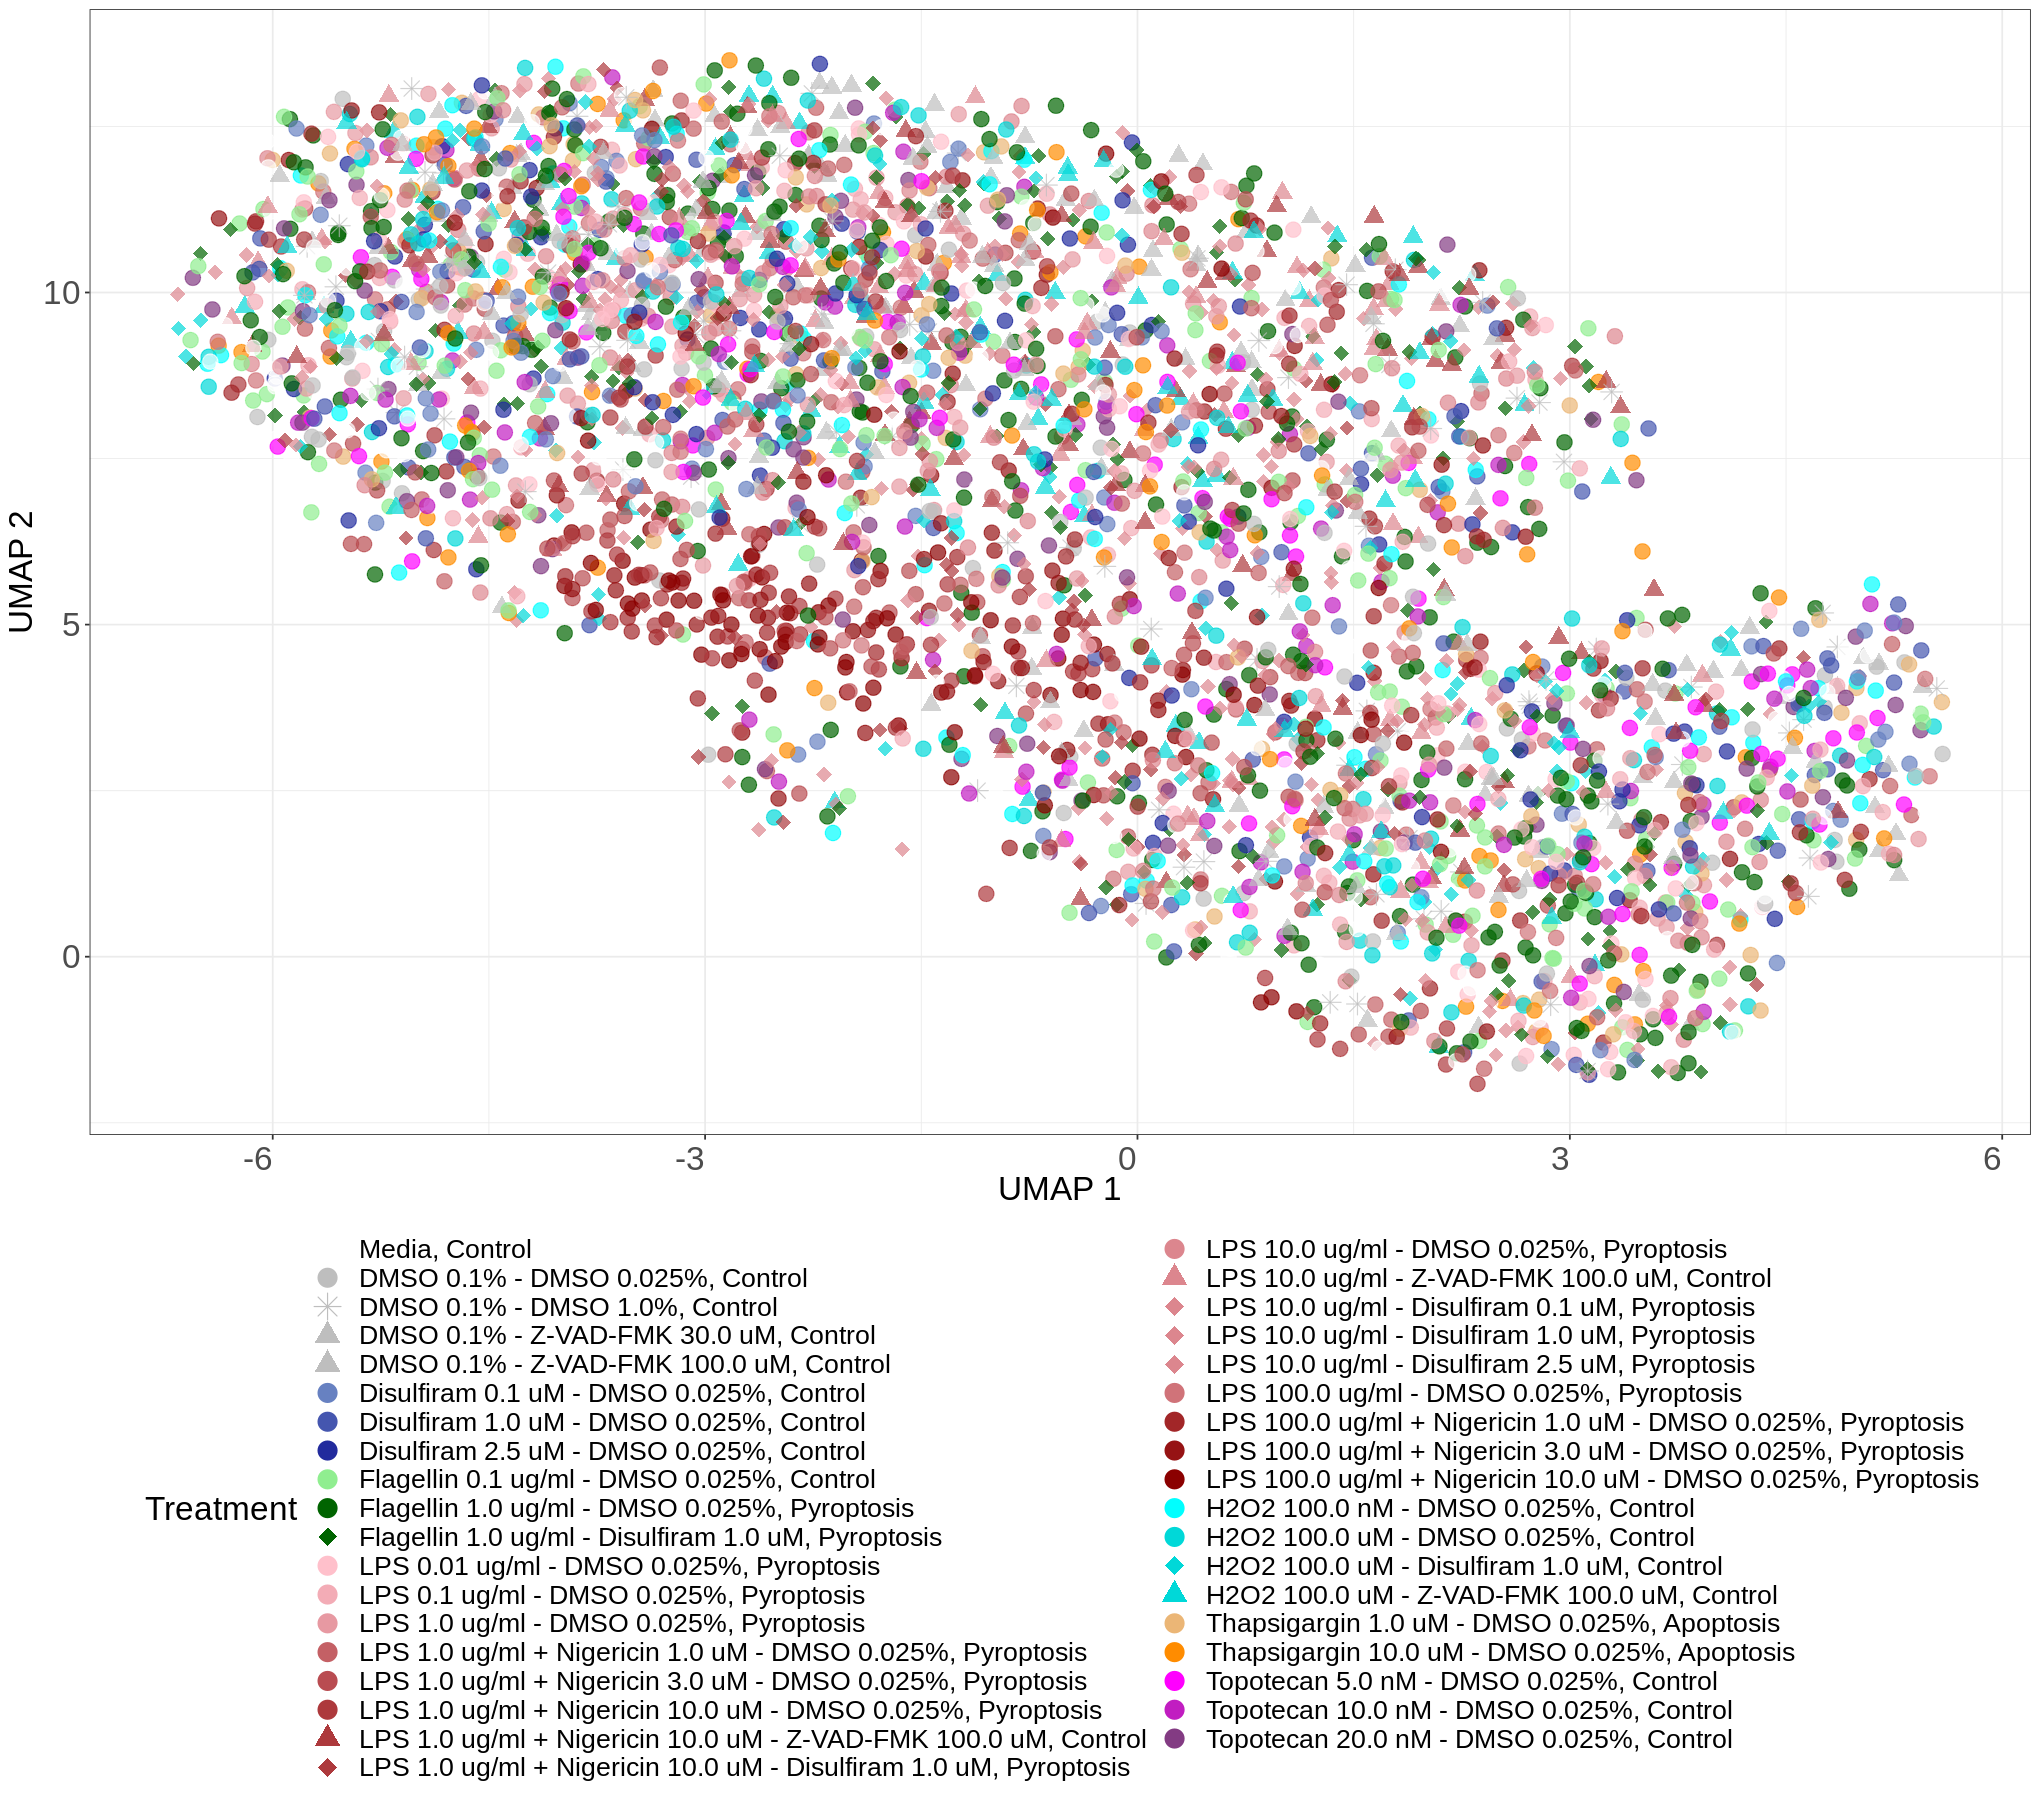

In [49]:
# set plot size 
width <- 17
height <- 15
options(repr.plot.width = width, repr.plot.height = height)
umap_plot_all <- (
    ggplot(cell_umap, aes(x = umap_1, y = umap_2)) 

    + geom_point(
        aes(
            color = group_treatment,
            shape = group_treatment
        ), 
        size = 4, 
        alpha = 0.7
    )
    + theme_bw()

    # rename legend title
    + labs(color = "Treatment", hjust = 0.5)
    + figure_theme
        + theme(axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=1))
            + theme(
         legend.text = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5))
    + scale_color_manual(
        name = "Treatment",
        labels = c(
            'Media, Control',
            'DMSO 0.1% - DMSO 0.025%, Control',
            'DMSO 0.1% - DMSO 1.0%, Control',
            'DMSO 0.1% - Z-VAD-FMK 30.0 uM, Control',
            'DMSO 0.1% - Z-VAD-FMK 100.0 uM, Control',
            'Disulfiram 0.1 uM - DMSO 0.025%, Control',
            'Disulfiram 1.0 uM - DMSO 0.025%, Control',
            'Disulfiram 2.5 uM - DMSO 0.025%, Control',
            'Flagellin 0.1 ug/ml - DMSO 0.025%, Control',
            'Flagellin 1.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'Flagellin 1.0 ug/ml - Disulfiram 1.0 uM, Pyroptosis',
            'LPS 0.01 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 0.1 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM, Control', 
            'LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM, Pyroptosis',
            'LPS 10.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM, Control', 
            'LPS 10.0 ug/ml - Disulfiram 0.1 uM, Pyroptosis', 
            'LPS 10.0 ug/ml - Disulfiram 1.0 uM, Pyroptosis',
            'LPS 10.0 ug/ml - Disulfiram 2.5 uM, Pyroptosis',
            'LPS 100.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%, Pyroptosis', 
            'LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%, Pyroptosis', 
            'H2O2 100.0 nM - DMSO 0.025%, Control',
            'H2O2 100.0 uM - DMSO 0.025%, Control',
            'H2O2 100.0 uM - Disulfiram 1.0 uM, Control',
            'H2O2 100.0 uM - Z-VAD-FMK 100.0 uM, Control', 
            'Thapsigargin 1.0 uM - DMSO 0.025%, Apoptosis', 
            'Thapsigargin 10.0 uM - DMSO 0.025%, Apoptosis', 
            'Topotecan 5.0 nM - DMSO 0.025%, Control',
            'Topotecan 10.0 nM - DMSO 0.025%, Control', 
            'Topotecan 20.0 nM - DMSO 0.025%, Control'
        ),
        values = colors)
    + scale_shape_manual(
        name = "Treatment",
        labels = c(
            'Media, Control',
            'DMSO 0.1% - DMSO 0.025%, Control',
            'DMSO 0.1% - DMSO 1.0%, Control',
            'DMSO 0.1% - Z-VAD-FMK 30.0 uM, Control',
            'DMSO 0.1% - Z-VAD-FMK 100.0 uM, Control',
            'Disulfiram 0.1 uM - DMSO 0.025%, Control',
            'Disulfiram 1.0 uM - DMSO 0.025%, Control',
            'Disulfiram 2.5 uM - DMSO 0.025%, Control',
            'Flagellin 0.1 ug/ml - DMSO 0.025%, Control',
            'Flagellin 1.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'Flagellin 1.0 ug/ml - Disulfiram 1.0 uM, Pyroptosis',
            'LPS 0.01 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 0.1 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM, Control', 
            'LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM, Pyroptosis',
            'LPS 10.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM, Control', 
            'LPS 10.0 ug/ml - Disulfiram 0.1 uM, Pyroptosis', 
            'LPS 10.0 ug/ml - Disulfiram 1.0 uM, Pyroptosis',
            'LPS 10.0 ug/ml - Disulfiram 2.5 uM, Pyroptosis',
            'LPS 100.0 ug/ml - DMSO 0.025%, Pyroptosis',
            'LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%, Pyroptosis', 
            'LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%, Pyroptosis',
            'LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%, Pyroptosis', 
            'H2O2 100.0 nM - DMSO 0.025%, Control',
            'H2O2 100.0 uM - DMSO 0.025%, Control',
            'H2O2 100.0 uM - Disulfiram 1.0 uM, Control',
            'H2O2 100.0 uM - Z-VAD-FMK 100.0 uM, Control', 
            'Thapsigargin 1.0 uM - DMSO 0.025%, Apoptosis', 
            'Thapsigargin 10.0 uM - DMSO 0.025%, Apoptosis', 
            'Topotecan 5.0 nM - DMSO 0.025%, Control',
            'Topotecan 10.0 nM - DMSO 0.025%, Control', 
            'Topotecan 20.0 nM - DMSO 0.025%, Control'
        ),
        values = shapes
    )
    + theme(legend.position = "bottom")
    # set the legend columns to 4
    # change legend alpha 
    + guides(color = guide_legend(ncol =2, override.aes = list(alpha = 1, size = 5)))
    + labs(
        x = "UMAP 1",
        y = "UMAP 2"
    )   
)
umap_plot_all
# save plot
ggsave(
    filename = file.path("..","figures", "umap_plot_all.png"),
    plot = umap_plot_all,
    width = width,
    height = height,
    units = "in",
    dpi = 600
)


In [50]:
# make a facet plot with all the groups 

In [51]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Pop!_OS 22.04 LTS

Matrix products: default
BLAS/LAPACK: /home/lippincm/miniconda3/envs/Interstellar/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] Polychrome_1.5.1      ggvenn_0.1.10         lubridate_1.9.3      
 [4] forcats_1.0.0         readr_2.1.4           tidyr_1.3.0          
 [7] tibble_3.2.1          tidyverse_2.0.0       VennDiagram_1.7.3    
[10] futile.logger_1.4.3   purrr_1.0.1           stringr_1.5.0        